In [95]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
# sns.set_palette('muted')
sns.set_palette(['#7fc97f', '#beaed4', '#fdc086'])

In [96]:
df = pd.read_csv("file_format_results.csv", index_col=0)
df['file_type'] = df.url.map(lambda x: Path(x).suffix[1:])
df['throughput'] *= 1e-6
df = df.loc[~((df.file_type == 'zarr') & df.kerchunk)]

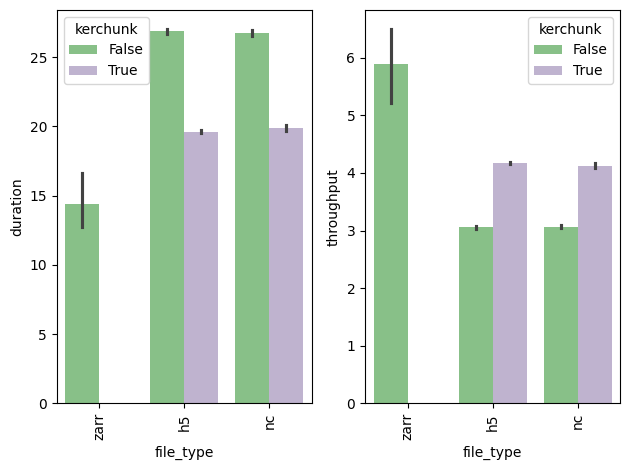

In [101]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df_rbb = df.loc[df.group == 'rbb']
df_rbb = df_rbb.loc[df_rbb.test_type == 'load']
df_rbb = df_rbb.sort_values('duration')
sns.barplot(df_rbb, x='file_type', y='duration', hue='kerchunk', ax=ax1)
ax1.tick_params(axis='x', rotation=90)
sns.barplot(df_rbb, x='file_type', y='throughput', hue='kerchunk', ax=ax2)
ax2.tick_params(axis='x', rotation=90)
plt.tight_layout()

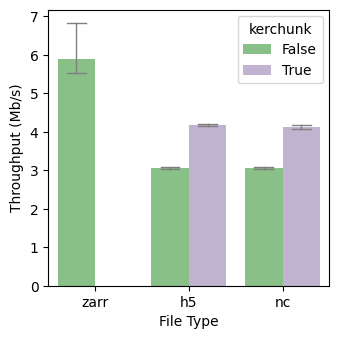

In [108]:
# Latex points to inches conversion factor
PTS_PER_INCH = 72.26999
# Latex text width in points
TEXT_WIDTH_PTS = 505.12177
# Latex column width in points
COLUMN_WIDTH_PTS = TEXT_WIDTH_PTS / 2
# Latex column width in inches
COLUMN_WIDTH_INCHES = COLUMN_WIDTH_PTS / PTS_PER_INCH
# Latex text width in inches
TEXT_WIDTH_INCHES = TEXT_WIDTH_PTS / PTS_PER_INCH
# DPI for figures
DPI = 600
# Font scale for figures
FONT_SCALE = 0.5
# Figure file format
FORMAT = "pdf"

fig, ax = plt.subplots(1, 1, figsize=(COLUMN_WIDTH_INCHES, COLUMN_WIDTH_INCHES))
ax = sns.barplot(df_rbb, x='file_type', y='throughput', hue='kerchunk', 
                 errorbar=("pi", 50), capsize=.4,
    err_kws={"color": ".5", "linewidth": 1}, ax=ax
                 )
ax.set_xlabel('File Type')
ax.set_ylabel('Throughput (Mb/s)')
plt.tight_layout()
plt.savefig('plots/zarr_load_test.png', dpi=DPI)
plt.savefig('plots/zarr_load_test.pdf', dpi=DPI)

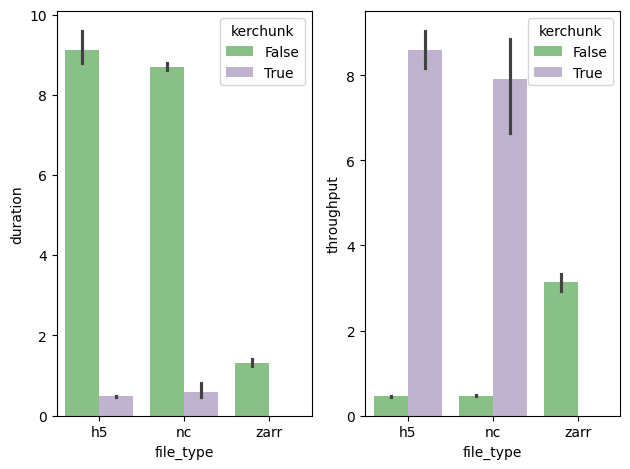

In [99]:
fig, (ax1, ax2) = plt.subplots(1, 2)
df_rbb = df.loc[df.group == 'efm']
df_rbb = df_rbb.loc[df_rbb.test_type == 'load']
df_rbb = df_rbb.sort_values('duration')
sns.barplot(df_rbb, x='file_type', y='duration', hue='kerchunk', ax=ax1)
sns.barplot(df_rbb, x='file_type', y='throughput', hue='kerchunk', ax=ax2)
plt.tight_layout()